In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'ef5e6c4cd6914ef5bc56f8c665380450')

In [ ]:
results = search_images_bing(key, 'aligator')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
dest = 'images/aligator.jpg'
download_url(ims[0], dest)

Path('images/aligator.jpg')

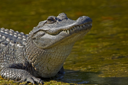

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
reptile_types = 'aligator','crocodile','crocodile toy'
path = Path('reptiles')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in reptile_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#439) [Path('reptiles/crocodile toy/80640018-6056-4816-81e3-309f7c452232.jpg'),Path('reptiles/crocodile toy/78fafbd8-0a5c-4f8b-a745-884c27f1fb46.jpg'),Path('reptiles/crocodile toy/bb4de737-69ca-4266-aeac-5da386dad7aa.jpg'),Path('reptiles/crocodile toy/20c5b5d2-50b7-425d-9ccb-6d3d0b60fd25.jpg'),Path('reptiles/crocodile toy/23b75a91-570d-444c-8f07-a42777318011.jpg'),Path('reptiles/crocodile toy/d7b79231-0c1c-4be1-9023-fa68ab4f1508.jpg'),Path('reptiles/crocodile toy/1ab20e65-c21a-494f-b93f-03b9274031ae.jpg'),Path('reptiles/crocodile toy/7aea4247-abdc-4233-b52e-aef90ff97a20.jpg'),Path('reptiles/crocodile toy/b8cc3ecb-0a98-4348-8517-238a439f2deb.jpeg'),Path('reptiles/crocodile toy/1f06ad99-047c-4caf-99a9-e49252fb8f19.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#14) [Path('reptiles/crocodile toy/d3b66c25-e6bf-4eb2-823f-473d72899dbe.jpg'),Path('reptiles/crocodile toy/9f673e32-aab0-4464-8efb-fd66096e0311.jpg'),Path('reptiles/crocodile toy/196f4ad4-9a44-439b-ac38-869f7e102bda.jpg'),Path('reptiles/crocodile toy/35d208a7-f168-4d25-a07d-38c5ee0ec5a5.jpg'),Path('reptiles/crocodile toy/2b38fadd-ed31-4840-ac3d-d40269a5823f.jpg'),Path('reptiles/crocodile toy/7b6ac9c2-562c-43d6-8244-def25d68e808.jpg'),Path('reptiles/crocodile toy/c9f40b45-4474-463d-a456-6b9487efe312.jpg'),Path('reptiles/aligator/c3432f6f-722b-4368-a144-4346824c8275.jpg'),Path('reptiles/aligator/76d6b2db-4d0d-4c89-a5df-baf046a9def9.jpg'),Path('reptiles/crocodile/fc14a912-30bd-4ea8-988d-915701f84b9c.JPG')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
reptiles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = reptiles.dataloaders(path)

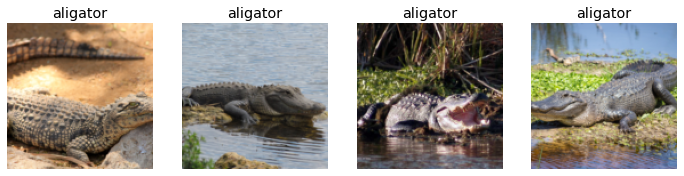

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

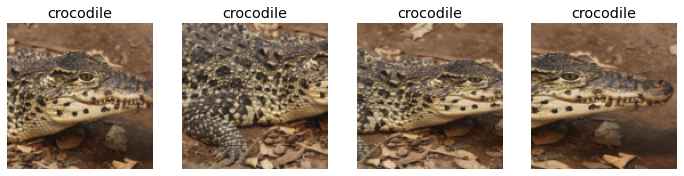

In [ ]:
reptiles = reptiles.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = reptiles.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

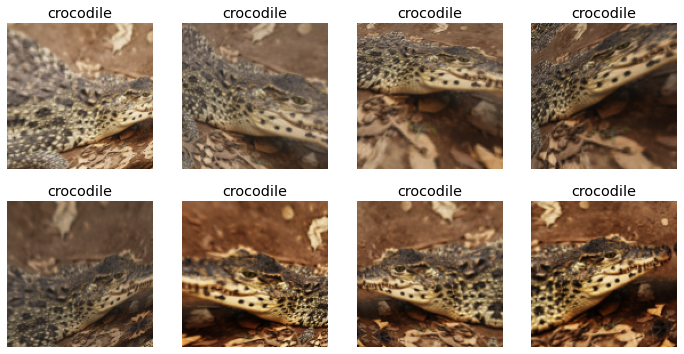

In [ ]:
reptiles = reptiles.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = reptiles.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
reptiles = reptiles.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = reptiles.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.743587,0.642980,0.282353,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.838161,0.578928,0.247059,02:50
1,0.730722,0.578024,0.188235,02:11
2,0.605030,0.525914,0.223529,02:08
3,0.540722,0.517138,0.223529,02:05


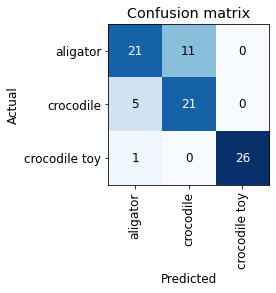

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# in case u are loading the model in a seperate notebook:

#learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn.predict('images/aligator.jpg')

('aligator', TensorBase(0), TensorBase([9.4842e-01, 5.1227e-02, 3.4894e-04]))

In [ ]:
learn.dls.vocab

['aligator', 'crocodile', 'crocodile toy']

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
reptiles = reptiles.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = reptiles.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# creating a webapp in this notebook using voila and ipy widgets

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn.predict(img.to_thumb(128,128))

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: crocodile; Probability: 0.5826')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img.to_thumb(128,128))
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your reptile!'), 
      btn_upload, btn_run, out_pl, lbl_pred])